In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

1 Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one

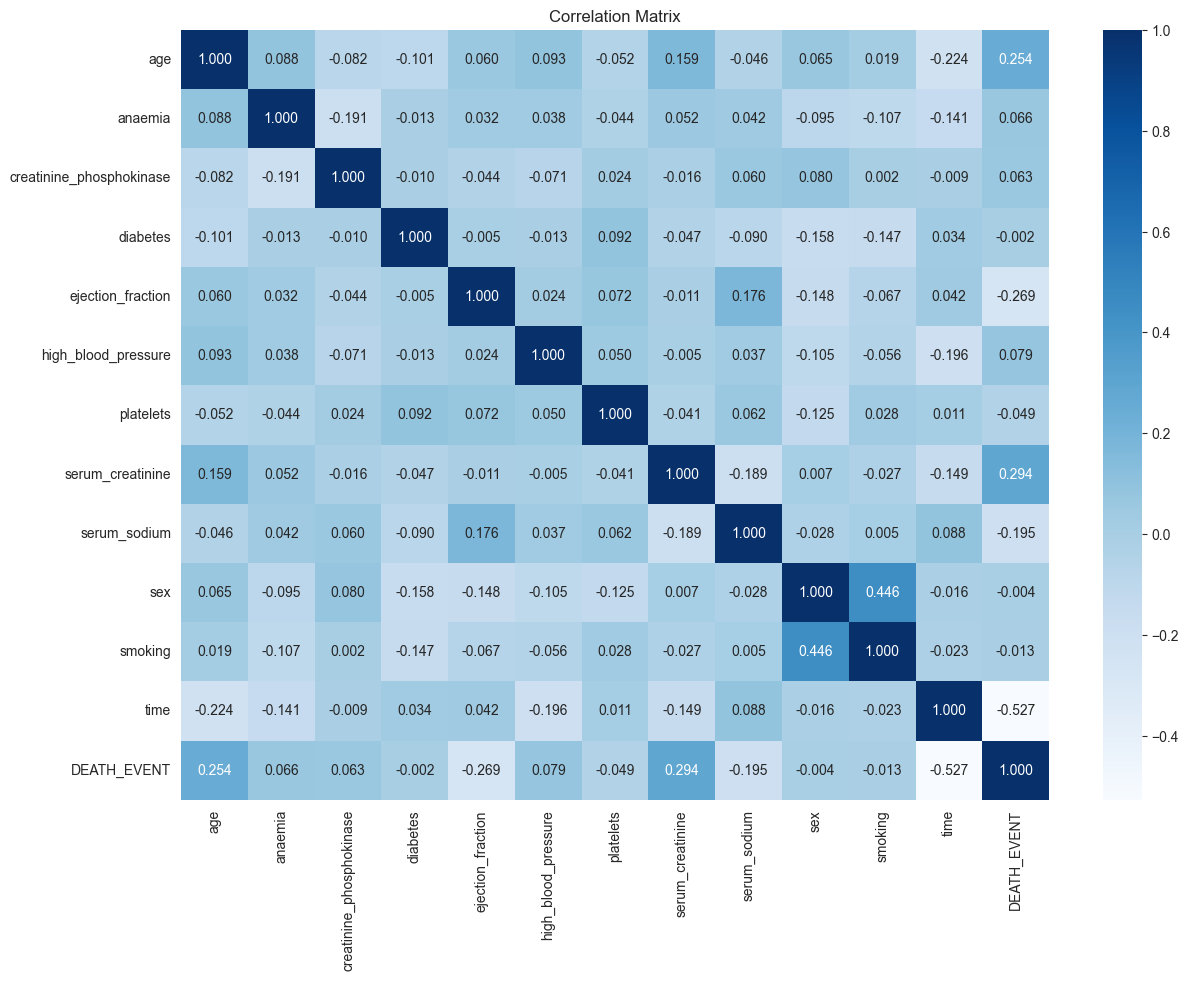

In [2]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".3f")
plt.title("Correlation Matrix")
plt.show()

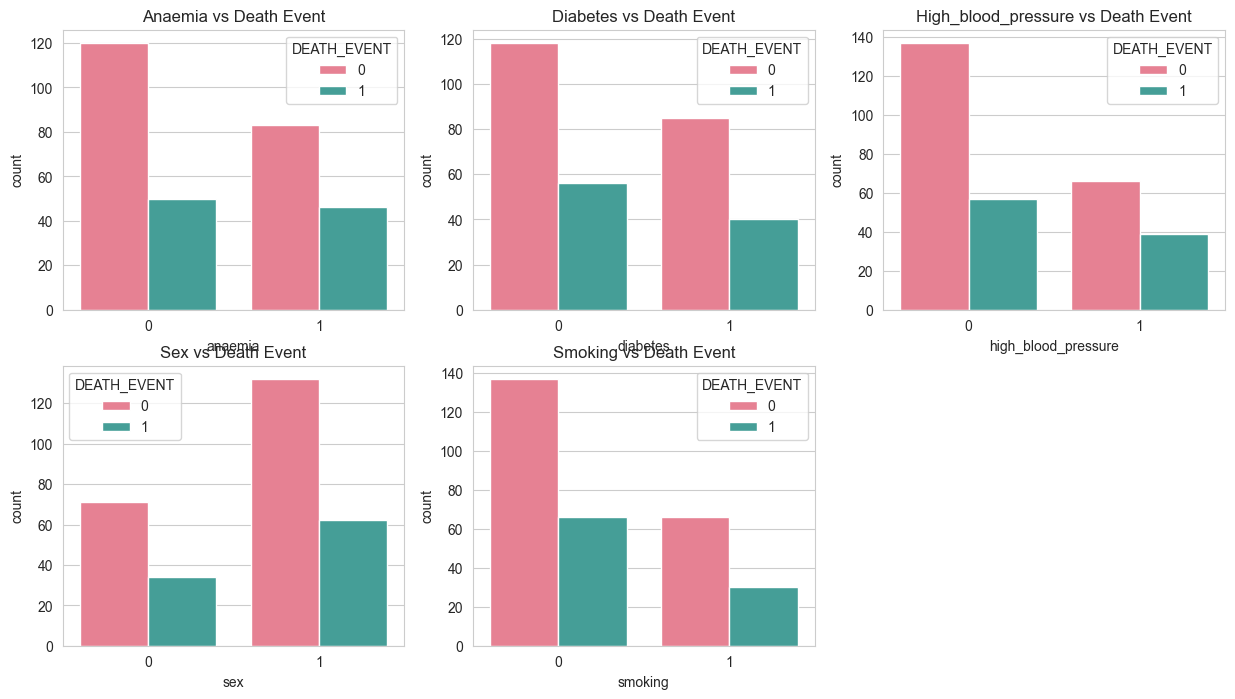

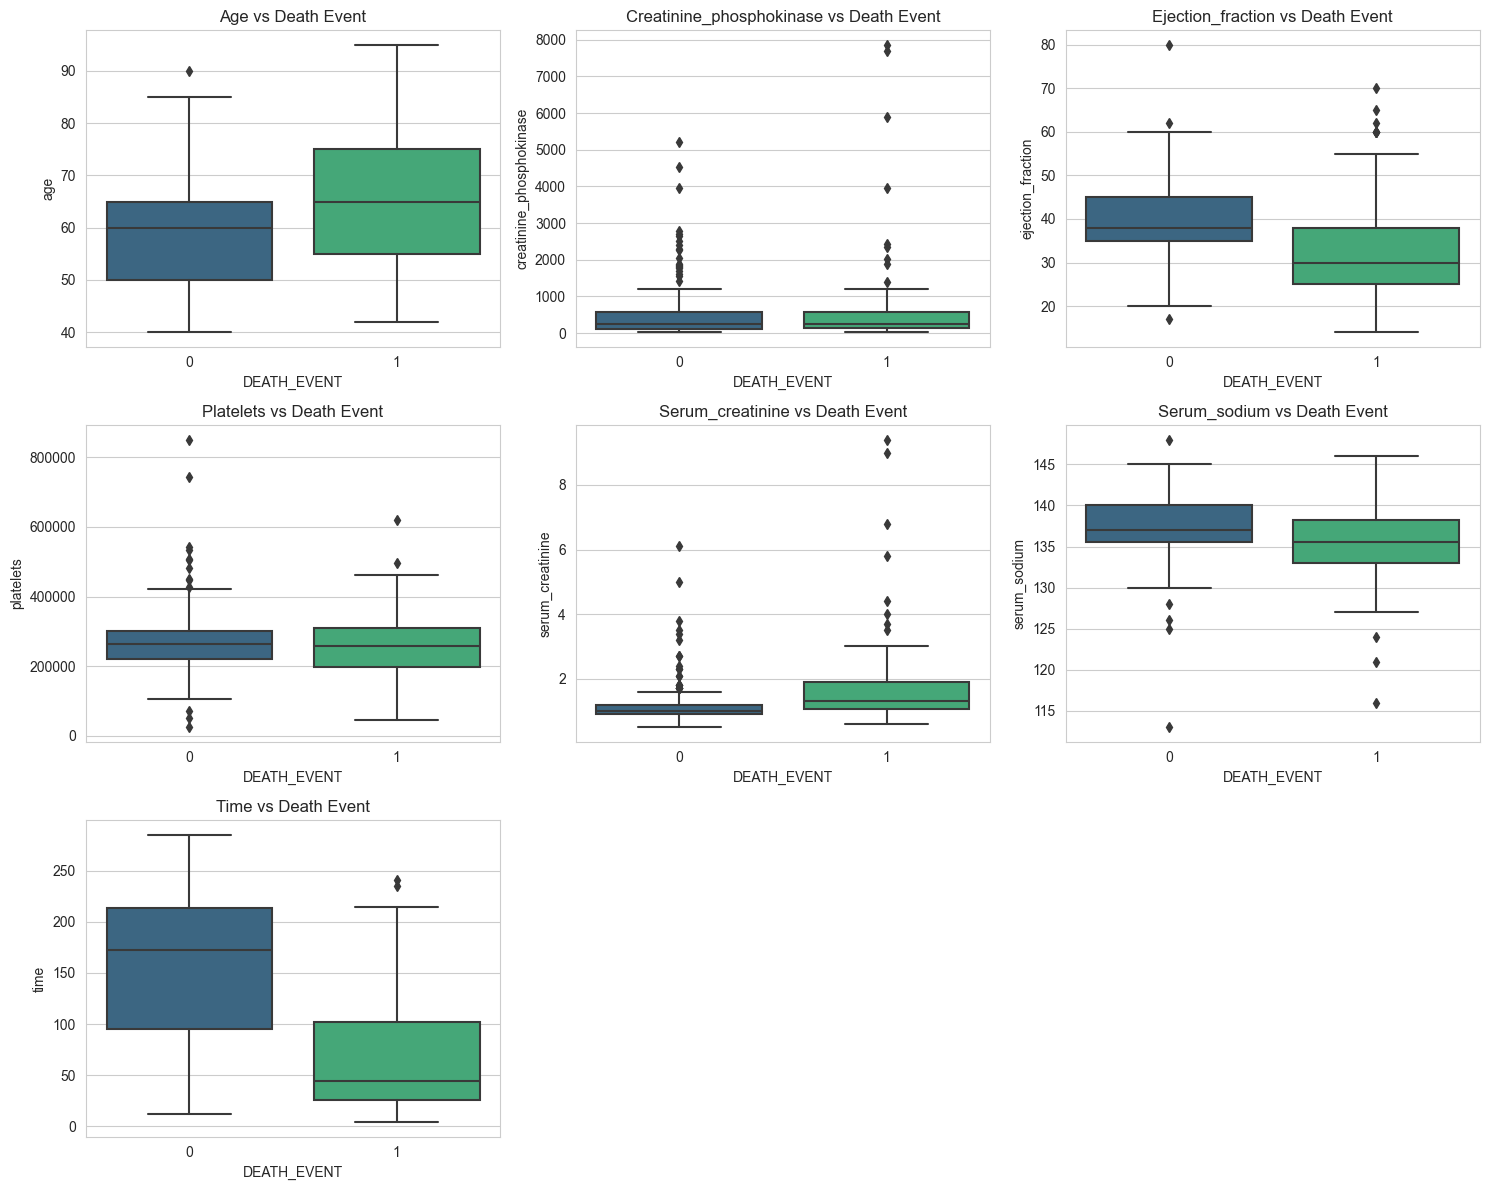

In [3]:
# Visualize the correlation of binary features with the target variable
binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='DEATH_EVENT', data=df, palette='husl')
    plt.title(f'{feature.capitalize()} vs Death Event')

# Visualize the correlation of continuous features with the target variable
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                       'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df, palette='viridis')
    plt.title(f'{feature.capitalize()} vs Death Event')

plt.tight_layout()
plt.show()

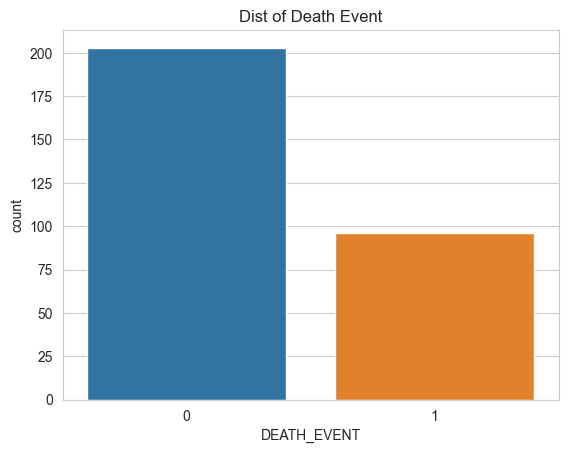

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Dist of Death Event")
plt.show()

2 Apply Machine Learning Modeling on the dataset using all the above 4 algorithms. Tune (hyper-parameter tuning) each model by calling the GridSearchCV method. Indicate which combination of Hyperparameters produces the best result. Note: Use accuracy and AUC-ROC metrics when evaluating your models.

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
}

# Perform GridSearchCV for each model
best_params = {}
for model_name, model in models.items():
    print(f"\n===== {model_name} =====")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Display the best hyperparameters
    best_params[model_name] = grid_search.best_params_
    print("Best Hyperparameters:", best_params[model_name])

    # Predict on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test_scaled)[:, 1])

    print("Accuracy:", accuracy)
    print("AUC-ROC:", roc_auc)

# Display the best hyperparameters for each model
print("\nBest Hyperparameters:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


===== Logistic Regression =====
Best Hyperparameters: {'C': 1}
Accuracy: 0.8
AUC-ROC: 0.824

===== Decision Tree =====
Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 5}
Accuracy: 0.7333333333333333
AUC-ROC: 0.7891428571428571

===== Random Forest =====
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6833333333333333
AUC-ROC: 0.8217142857142857

===== XGBoost =====
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.75
AUC-ROC: 0.8674285714285714

Best Hyperparameters:
Logistic Regression: {'C': 1}
Decision Tree: {'max_depth': 5, 'min_samples_split': 5}
Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


3

a. Interpret the Logistic Regression model using 'eli5':

In [6]:
import eli5
from eli5.sklearn import PermutationImportance

# Fit the Logistic Regression model
lr_model = LogisticRegression(C=best_params['Logistic Regression']['C'])
lr_model.fit(X_train_scaled, y_train)

# Visualize feature weights
eli5.show_weights(lr_model, feature_names=X.columns.tolist())

Weight?,Feature
+0.702,serum_creatinine
+0.661,age
+0.164,diabetes
+0.111,creatinine_phosphokinase
+0.071,smoking
-0.052,anaemia
-0.061,high_blood_pressure
-0.170,platelets
-0.260,serum_sodium
-0.362,sex


b. Interpret the Decision Tree model using 'eli5':

In [7]:
# Fit the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=best_params['Decision Tree']['max_depth'],
                                  min_samples_split=best_params['Decision Tree']['min_samples_split'])
dt_model.fit(X_train_scaled, y_train)

# List feature importance
eli5.show_weights(dt_model, feature_names=X.columns.tolist())

Weight,Feature
0.6020,time
0.1756,serum_creatinine
0.0625,platelets
0.0606,creatinine_phosphokinase
0.0376,ejection_fraction
0.0375,serum_sodium
0.0166,age
0.0076,diabetes
0,smoking
0,sex


c. Use LIME to explain Random Forest and XGBoost models:

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
from lime.lime_tabular import LimeTabularExplainer
import lime
from sklearn.ensemble import RandomForestClassifier as RF
from xgboost import XGBClassifier as XGB

# Create LIME explainer for Random Forest
lime_rf_explainer = LimeTabularExplainer(X_train.values, mode='classification', feature_names=X.columns.tolist())
# Explain a positive prediction
lime_rf_exp_pos = lime_rf_explainer.explain_instance(X_test[y_test == 1].iloc[0], rf_model.predict_proba, num_features=len(X.columns))
# Explain a negative prediction
lime_rf_exp_neg = lime_rf_explainer.explain_instance(X_test[y_test == 0].iloc[0], rf_model.predict_proba, num_features=len(X.columns))

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
rf = RF()
parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,5,10],
              'max_leaf_nodes': list(range(2, 25)),
              'min_samples_split': [2, 3, 4]}


scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy'}

rf_gs = GridSearchCV(rf, parameters, scoring=scoring, cv=3, refit="AUC",
                     n_jobs=2,
                     return_train_score=True)
rf_gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24],
                         'min_samples_split': [2, 3, 4]},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy'})

In [11]:
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_names = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
categorical_features= [1, 3, 5, 9, 10]

In [12]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = list(X.columns), class_names=['0','1'],
                                                   categorical_features=categorical_features,
                                                   categorical_names=categorical_names, kernel_width=3)

In [13]:
exp = explainer.explain_instance(X_test.iloc[8].values, rf_gs.best_estimator_.predict_proba) #, num_features=2, top_labels=1)

/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
exp.show_in_notebook(show_table=True, show_all=False)

In [15]:
print('Tru value: ', y_test.iloc[8])
print('R2 score: ', exp.score)

Tru value:  1
R2 score:  0.8380198822117818


In [16]:
xgb = XGB()
parameters = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}


scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy'}

xgb_gs = GridSearchCV(xgb, parameters, scoring=scoring, cv=3, refit="AUC",
                      n_jobs=2,
                      return_train_score=True)
xgb_gs.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy'})

In [17]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=list(X.columns),
                                                   class_names=['0', '1'],
                                                   categorical_features=categorical_features,
                                                   categorical_names=categorical_names, kernel_width=3)
exp = explainer.explain_instance(X_test.iloc[3].values, xgb_gs.best_estimator_.predict_proba)
exp.show_in_notebook(show_table=True, show_all=False)

In [18]:
print('Tru value: ', y_test.iloc[3])
print('R2 score: ', exp.score)

Tru value:  1
R2 score:  0.6568106213489392


d. Use SHAP to interpret the XGBoost model:

In [19]:
import shap

In [20]:
xgb_model = XGBClassifier(learning_rate=best_params['XGBoost']['learning_rate'],
                          n_estimators=best_params['XGBoost']['n_estimators'],
                          max_depth=best_params['XGBoost']['max_depth'])
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
explainer = shap.TreeExplainer(xgb_model,data = X_train, model_output = 'probability')

In [22]:
shap_values = explainer(X_test, y_test)

In [23]:
explainer.expected_value

0.21882453235605542

In [24]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values ,feature_names = list(X.columns), class_names=['0','1'],
                                                   categorical_features=categorical_features,
                                                   categorical_names=categorical_names, kernel_width=3)

In [25]:
explainer = shap.TreeExplainer(xgb_gs.best_estimator_, data=X_train, model_output='probability')
shap_values = explainer(X_test, y_test)
explainer.expected_value
shap.initjs()
shap.plots.force(shap_values[1])

In [26]:
shap.initjs()
shap.plots.force(shap_values[3])

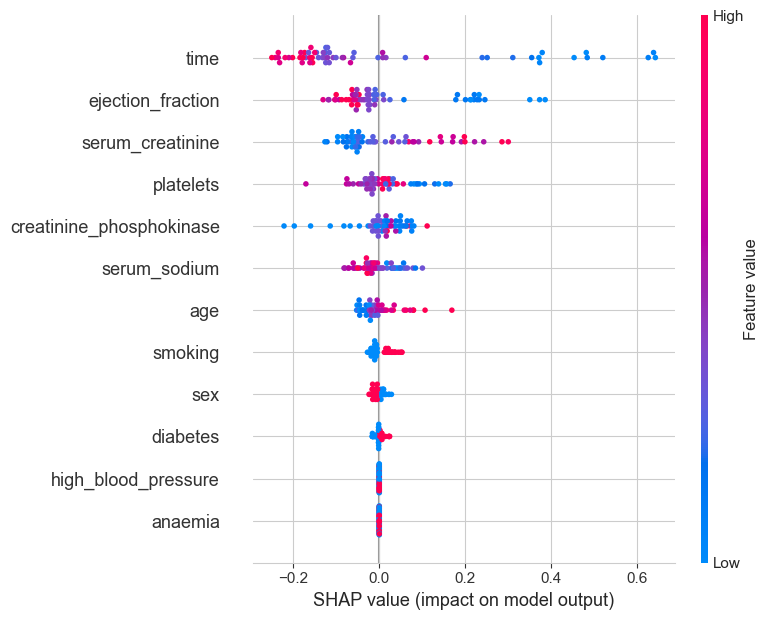

In [27]:
shap.initjs()
shap.summary_plot(shap_values)

4) Predict observations, one for positive and one for negative label, by using all four (4) models and indicate which one gives the better prediction.

In [28]:
# Select one positive and one negative observation for prediction
sample_pos = X_test_scaled[y_test == 1][0].reshape(1, -1)
sample_neg = X_test_scaled[y_test == 0][0].reshape(1, -1)

# Predict probabilities for each model
lr_prob = lr_model.predict_proba(sample_pos)[0], lr_model.predict_proba(sample_neg)[0]
dt_prob = dt_model.predict_proba(sample_pos)[0], dt_model.predict_proba(sample_neg)[0]
rf_prob = rf_model.predict_proba(sample_pos)[0], rf_model.predict_proba(sample_neg)[0]
xgb_prob = xgb_model.predict_proba(sample_pos)[0], xgb_model.predict_proba(sample_neg)[0]

# Display the predicted probabilities for each model
print("LR:", lr_prob)
print("DT:", dt_prob)
print("RF:", rf_prob)
print("XGB:", xgb_prob)

LR: (array([0.89169345, 0.10830655]), array([0.93211417, 0.06788583]))
DT: (array([0.89655172, 0.10344828]), array([0., 1.]))
RF: (array([0.37, 0.63]), array([0.24, 0.76]))
XGB: (array([0.88729054, 0.11270945], dtype=float32), array([0.39404833, 0.60595167], dtype=float32))


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
